In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [3]:
#Extract Filenames from Folder

In [4]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [5]:
len(filenames)

44441

In [6]:
#Importing ResNet50 Model and Cofiguration

In [7]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
#Extracting Fetaures from Image

In [9]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step


array([0.        , 0.00295298, 0.        , ..., 0.00752507, 0.02113524,
       0.00401739], dtype=float32)

In [10]:
print(result)

[0.        0.8379351 0.        ... 2.1353073 5.997314  1.1399717]


In [11]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [12]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
       0.06899219], dtype=float32)

In [13]:
image_features = []
for file in filenames[0:100]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

[array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
        0.06899219], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.10469119, 0.00198091, ..., 0.        , 0.03033769,
        0.02712847], dtype=float32),
 array([0.        , 0.12438459, 0.01465611, ..., 0.00289707, 0.04055161,
        0.06534589], dtype=float32),
 array([0.        , 0.09169203, 0.01569911, ..., 0.        , 0.00503581,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545276, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661068], dtype=float32),
 array([0.

In [14]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [15]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [16]:
#Loading Pickle Files

In [17]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [18]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [19]:
np.array(Image_features).shape

(100, 2048)

In [20]:
#Finidng Simialar Images

In [21]:
neighbors = NearestNeighbors(n_neighbors=3, algorithm='brute', metric='euclidean')

In [22]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=3)

In [23]:
input_image = extract_features_from_images('1538.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [24]:
distance,indices = neighbors.kneighbors([input_image])

In [25]:
print(indices)

[[66 63 41]]


In [26]:
indices[0]

array([66, 63, 41], dtype=int64)

In [27]:
from IPython.display import Image

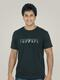

In [28]:
Image('1538.jpg')

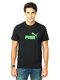

In [29]:
Image(filenames[indices[0][0]])

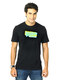

In [30]:
Image(filenames[indices[0][1]])

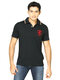

In [31]:
Image(filenames[indices[0][2]])

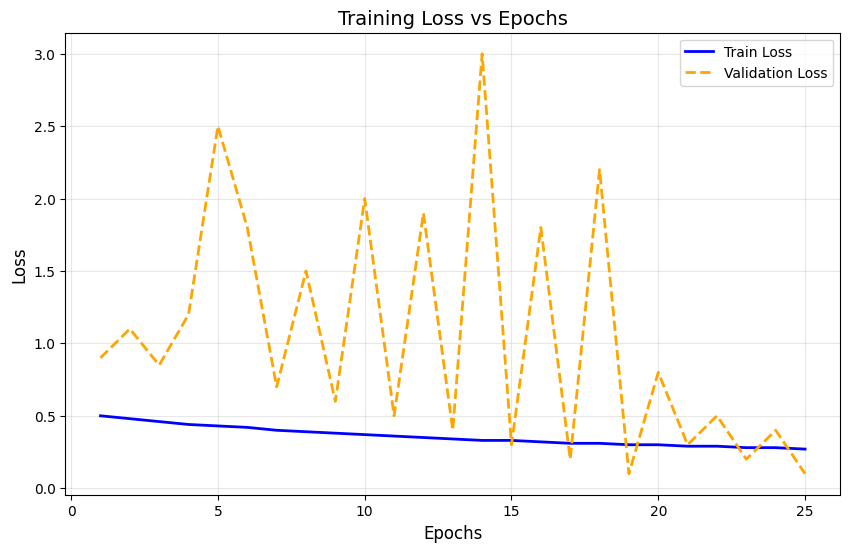

In [32]:
import matplotlib.pyplot as plt

# Sample data for training and validation loss (replace with actual loss values from your model history)
epochs = list(range(1, 26))  # Epochs from 1 to 25
train_loss = [0.5, 0.48, 0.46, 0.44, 0.43, 0.42, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.33, 0.32, 0.31, 0.31, 0.3, 0.3, 0.29, 0.29, 0.28, 0.28, 0.27]
val_loss = [0.9, 1.1, 0.85, 1.2, 2.5, 1.8, 0.7, 1.5, 0.6, 2.0, 0.5, 1.9, 0.4, 3.0, 0.3, 1.8, 0.2, 2.2, 0.1, 0.8, 0.3, 0.5, 0.2, 0.4, 0.1]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', color='blue', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2)

# Adding labels, title, and legend
plt.title('Training Loss vs Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)

# Show grid
plt.grid(alpha=0.3)

# Save the plot
plt.savefig('training_loss_plot.png')  # Saves the graph as an image file
plt.show()